# DBS rotation test tracking
This is very trivial manual position tracking but it's only of 15 seconds of the video so doesn't take that long and is more efficient than training a neural network. Basically just launching the video stream with opencv and have a callback function for the cursor position. Just put that on the head or implant location whatever you want to track and we'll have the data. Everything else is just playing with matplotlib to get the gradients for the lines on the figure/demo vids.

In [1]:
#Imports
import numpy as np
from skimage.measure import label, regionprops, find_contours
import imageio
import cv2
import operator
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import time
from tqdm import tqdm_notebook
import os


print(cv2.__version__)

4.1.1


In [1]:
#Imports
import numpy as np
from skimage.measure import label, regionprops, find_contours
import imageio
import cv2
import operator
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import time
from tqdm import tqdm_notebook
import os


print(cv2.__version__)

#File IO
infile = '/media/shayok/3TBData/Data/magreward/onResonanceRotationVids/OnResonance0.mp4' #CHANGE ME!
reader = imageio.get_reader(infile)
fps = reader.get_meta_data()['fps']
print('input video file length is {} seconds'.format(reader.get_length()/(fps)))
print('input video file has a framerate of {} fps'.format(fps))
writer = imageio.get_writer('/media/shayok/3TBData/Data/magreward/onResonanceRotationVids/onResonance0-tracked.mp4', fps=fps) #CHANGE ME PER VIDEO!

frameWait = 250 #msec #CHANGE ME!

pauseTime = 0.5 #sec

#Class to store coordinates
class Position:
    def __init__(self, m, n):
        self.coordinates = np.zeros((m, n))

    def select_coordinates(self, event, x, y, flags, param):
        if event == cv2.EVENT_MOUSEMOVE:
            #Set coordinates to mouse position
            self.coordinates[i, :] = [x, y]
                
#Instantiate class
position = Position(reader.count_frames(), 2)

#Set up display windows
cv2.namedWindow('im', flags=cv2.WINDOW_AUTOSIZE)
cv2.setMouseCallback('im', position.select_coordinates)

print("Playing video")

#Read in file frame by frame
for i, im in enumerate(tqdm_notebook(reader, desc='Playing back video')):
    if i==0:
        time.sleep(pauseTime)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    cv2.imshow('im', im)
    #Wait frameWait before moving on to next frame
    k = cv2.waitKey(frameWait) & 0xFF 
    if k == 99: #'c' 
        print(position.coordinates[i, :])
        k = 0 #Reset key or coordinates will keep printing
    if k == 112: #'p'
        print("Video paused for {} seconds".format(pauseTime))
        time.sleep(pauseTime)
        print("Playing video")
    if k == 27: #'ESC' 
        break

    if i>0 and all(position.coordinates[i, :]==[0, 0]):
        #No change in mouse detected so set coordinates to that of previous timestamp
        position.coordinates[i, :] = position.coordinates[i-1, :]

    #Draw tracker
    cv2.circle(  im,(int(position.coordinates[i,0]), int(position.coordinates[i,1])),
                 4,(255,255,255),-1) #White filled circle
    cv2.circle(  im,(int(position.coordinates[i,0]), int(position.coordinates[i,1])),
                 5,(0,0,255),1) #Red circle            
    cv2.ellipse( im,(int(position.coordinates[i,0]), int(position.coordinates[i,1])),
                 (4,4), 0,   0,  90, (0,0,255), -1 )
    cv2.ellipse( im,(int(position.coordinates[i,0]), int(position.coordinates[i,1])), 
                 (4,4), 0, 180, 270, (0,0,255), -1 )
    cv2.circle(  im,(int(position.coordinates[i,0]), int(position.coordinates[i,1])),
                 1, (0,255,0), 1) #Draw center
    #Writer needs RGB format
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    writer.append_data(im)
     
writer.close()
cv2.destroyAllWindows()

np.savez('/media/shayok/3TBData/Data/magreward/onResPos0.npz',positions=position.coordinates) #CHANGE ME TOO!

4.1.1
input video file length is inf seconds
input video file has a framerate of 30.0 fps
Playing video


/home/shayok/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [22]:
position = np.load("/media/shayok/3TBData/Data/magreward/onResPos1.npz")['positions']

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl
from moviepy.video.io.bindings import mplfig_to_npimage
from matplotlib.colors import LinearSegmentedColormap

In [4]:
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

In [23]:
position.shape

(900, 2)

In [5]:
ignoreFrames = 7

In [61]:
position = np.load("/media/shayok/3TBData/Data/magreward/offResPos.npz")['positions'][ignoreFrames:,:]
positions = nel.AnalogSignalArray(position,fs=30)
positions = positions.smooth(sigma=0.01)

In [63]:
points1 = np.array([positions.data[:,0], positions.data[:,1]]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points1[:-1], points1[1:]], axis=1)

In [64]:
from tqdm import notebook 

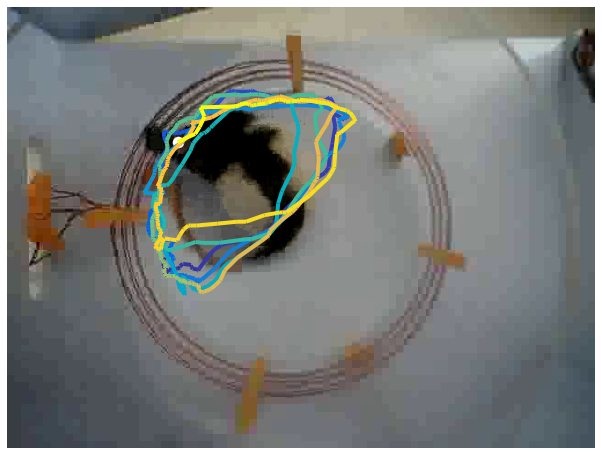

In [65]:
filename='/media/shayok/3TBData/Data/magreward/offResonanceRotationVids/OffResonance.mp4'
reader = imageio.get_reader(filename)
fps = reader.get_meta_data()['fps']

for i, im in notebook.tqdm(enumerate(reader)):   
    if i >= ignoreFrames:
        if i > ignoreFrames:

            ax = plt.gca()

            fig = plt.gcf()
            DPI = fig.get_dpi()
            fig.set_size_inches(640.0/float(DPI),480.0/float(DPI))
            ax.clear()
            ax.imshow(im)
            ax.scatter(positions.data[:,0][i-ignoreFrames],positions.data[:,1][i-ignoreFrames],color='white',s=125)
            norm1 = plt.Normalize(0, ((i-ignoreFrames)/fps))
            lc1 = LineCollection(segments1[:(i-ignoreFrames)], cmap=parula_map, norm=norm1)
            # Set the values used for colormapping
            lc1.set_array(np.linspace(0, ((i-ignoreFrames)/fps), (i-ignoreFrames)))
            lc1.set_linewidth(4)
            line1 = ax.add_collection(lc1)
            ax.set_xlim(0, 640)
            ax.set_ylim(0, 480)
            ax.axis("off")
            plt.axis("off")
            plt.savefig("/media/shayok/3TBData/Data/magreward/offResonanceRotationVids/parula/%04d.tiff"%(i-ignoreFrames),transparent=True)
        else:
            ax = plt.gca()

            fig = plt.gcf()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            DPI = fig.get_dpi()
            fig.set_size_inches(640.0/float(DPI),480.0/float(DPI))
            ax.clear()
            ax.imshow(im)
            ax.scatter(positions.data[:,0][i-ignoreFrames],positions.data[:,1][i-ignoreFrames],color='white',s=125)
            ax.set_xlim(0, 640)
            ax.set_ylim(0, 480)
            ax.axis("off")
            plt.tight_layout()
            plt.axis("off")
            plt.savefig("/media/shayok/3TBData/Data/magreward/offResonanceRotationVids/parula/%04d.tiff"%(i-ignoreFrames),transparent=True,bbox='tight')
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break

cv2.destroyAllWindows()

`ffmpeg -r 60 -i %04d.tiff off_res.mp4`<br>
`ffmpeg -i off_res.mp4 -filter:v "crop=611:455:14:12" off_res_cropped.mp4`<br>
`ffmpeg -i off_res_cropped.mp4 -vf scale=640x480 off_resScaled.mp4`

In [18]:
import nelpy as nel
import nelpy.plotting as npl
#Shay's plot settings
%matplotlib inline
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Cd Std', font_scale=2, palette='deep', style='white',\
         rc=({'figure.figsize': (6, 3), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':20, 'legend.fontsize': 20, 'ytick.labelsize': 20, 'xtick.labelsize': 20}))

/home/shayok/Documents/Code/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


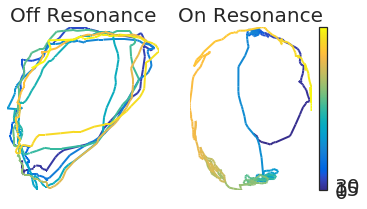

In [66]:
# Smoothen head coord 

position = np.load("/media/shayok/3TBData/Data/magreward/offResPos.npz")['positions'][ignoreFrames:,:]
positions = nel.AnalogSignalArray(position,fs=30)
positions = positions.smooth(sigma=0.01)

positions_off = positions.data

x= position_off[:,0]
y= position_off[:,1]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, len(position_off)-1)
lc = LineCollection(segments, cmap=parula_map, norm=norm)

# Set the values used for colormapping
lc.set_array(np.arange(0, len(position_off)-1, 1))
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
axs[0].set_title("Off Resonance")

# fig.colorbar(line, ax=axs[0])
axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(y.min(), y.max())
axs[0].axis("off")


position = np.load("/media/shayok/3TBData/Data/magreward/onResPos1.npz")['positions'][ignoreFrames:,:]
positions = nel.AnalogSignalArray(position,fs=30)
positions = positions.smooth(sigma=0.01)


position_on = positions.data
    
x1= position_on[:,0]
y1= position_on[:,1]
points1 = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points1[:-1], points1[1:]], axis=1)

# Use a boundary norm instead
norm1 = plt.Normalize(0, len(position_off)-1)
lc1 = LineCollection(segments1, cmap=parula_map, norm=norm1)

# Set the values used for colormapping
lc1.set_array(np.arange(0, len(position_off)-1, 1))
lc1.set_linewidth(2)
line1 = axs[1].add_collection(lc1)
axs[1].set_title("On Resonance")
fig.colorbar(line1, ax=axs[1],ticks=range(0,31,15))
axs[1].set_xlim(x1.min(), x1.max())
axs[1].set_ylim(y1.min(), y1.max())
axs[1].axis("off")
plt.savefig("/media/shayok/3TBData/Data/magreward/rotations.svg",transparent=True)
plt.show()